In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anthro.viz
colors = anthro.viz.plotting_style()
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [2]:
#%% Load the population data 
pop_data = pd.read_csv('../../../data/anthropocentric/FAOSTAT_world_population/processed/FAOSTAT_rural_urban_population.csv')
pop_data['pop_bil'] = pop_data['population'] / 1E9
total_pop = pop_data.groupby(['year'])['pop_bil'].sum().reset_index()
min_pop, max_pop = total_pop['pop_bil'].min(), total_pop['pop_bil'].max()

In [3]:
anthropo = pd.read_csv('../../../data/anthropocentric/Elhacham2020_anthropomass/processed/anthopogenic_mass_2015_processed.csv')
# Tidy
anthropo.rename(columns={'Year':'year'}, inplace=True)
merged = anthropo.merge(total_pop, on='year')
merged.dropna(inplace=True)
merged['bricks_asphalt'] = merged['bricks_Tt'].values + merged['asphalt_Tt'].values
#merged['all_others'] = merged['metals_Tt'].values + merged['waste_Tt'].values + merged['other_Tt']

merged['all_others'] = merged['metals_Tt'].values + merged['other_Tt']

In [4]:
merged.head()

,Unnamed: 0,year,concrete_Tt,aggregates_Tt,bricks_Tt,asphalt_Tt,metals_Tt,other_Tt,waste_Tt,total_Tt,pop_bil,bricks_asphalt,all_others
0,50,1950,0.013634,0.038438,0.017360,0.001994,0.004221,0.006379,0.026745,0.108770,2.536275,0.019354,0.010600
1,51,1951,0.014360,0.039760,0.017477,0.002227,0.004347,0.006446,0.027656,0.112272,2.583817,0.019704,0.010793
2,52,1952,0.015154,0.041185,0.017600,0.002483,0.004477,0.006518,0.028598,0.116014,2.630584,0.020082,0.010995
3,53,1953,0.016047,0.042648,0.017721,0.002754,0.004629,0.006593,0.029570,0.119962,2.677230,0.020475,0.011222
4,54,1954,0.017036,0.044238,0.017843,0.003040,0.004812,0.006673,0.030584,0.124226,2.724302,0.020883,0.011485


In [5]:
decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
bricks_decades = np.zeros(7)
concrete_decades = np.zeros(7)
others_decades = np.zeros(7)
aggregates_decades = np.zeros(7)
waste_decades = np.zeros(7)

for i in range(len(decades)-1):
    
    decade = decades[i]
    
    df_decade = merged[merged['year']>= decade]
    df_decade = df_decade[df_decade['year']< decades[i+1]]
    
    pop_decade = df_decade['pop_bil'].mean()
    bricks_decade = df_decade['bricks_asphalt'].mean() / pop_decade
    concrete_decade = df_decade['concrete_Tt'].mean() / pop_decade
    others_decade = df_decade['all_others'].mean() / pop_decade
    aggregates_decade = df_decade['aggregates_Tt'].mean() / pop_decade
    waste_decade = df_decade['waste_Tt'].mean() / pop_decade
    
    bricks_decades[i] = bricks_decade
    concrete_decades[i] = concrete_decade
    others_decades[i] = others_decade
    aggregates_decades[i] = aggregates_decade
    waste_decades[i] = waste_decade

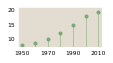

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('bricks & asphalt per capita [10$^{3}$kg]', fontsize=6)
ax.set_xticks((1950, 1970, 1990, 2010))
#ax.set_yticks((0, 5, 10, 15))
ax.set_ylim((np.min(bricks_decades)*0.9*1e3, np.max(bricks_decades)*1.1*1e3))

ax.plot(decades[0:-1], bricks_decades*1e3, 'o', ms=3, color=colors['green'])
ax.vlines(decades[0:-1], 0, bricks_decades*1e3, lw=0.5, color=colors['green'])

plt.savefig('../../../figures/database_paper/bricks_asphalt_decades.svg')

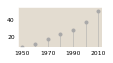

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$kg]', fontsize=6)
ax.set_xticks((1950, 1970, 1990, 2010))
#ax.set_yticks((0, 10, 20, 30))
ax.set_ylim((np.min(concrete_decades)*0.9*1e3, np.max(concrete_decades)*1.1*1e3))

ax.plot(decades[0:-1], concrete_decades*1e3, 'o', ms=3, color='darkgrey')
ax.vlines(decades[0:-1], 0, concrete_decades*1e3, lw=0.5, color='darkgrey')

plt.savefig('../../../figures/database_paper/concrete_decades.svg')

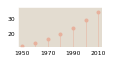

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$kg]', fontsize=6)
ax.set_xticks((1950, 1970, 1990, 2010))
#ax.set_yticks((0, 10, 20, 30))

ax.set_ylim((np.min(waste_decades)*0.9*1e3, np.max(waste_decades)*1.1*1e3))

ax.plot(decades[0:-1], waste_decades*1e3, 'o', ms=3, color=colors['light_red'])
ax.vlines(decades[0:-1], 0, waste_decades*1e3, lw=0.5, color=colors['light_red'])

plt.savefig('../../../figures/database_paper/waste_decades.svg')

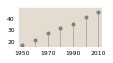

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(1.5,0.75))

ax.xaxis.set_tick_params(labelsize=6)
ax.yaxis.set_tick_params(labelsize=6)
#ax.set_ylabel('per capita [10$^{3}$kg]', fontsize=6)
ax.set_xticks((1950, 1970, 1990, 2010))
ax.set_yticks((0, 10, 20, 30, 40))
ax.set_ylim((np.min(aggregates_decades)*0.9*1e3, np.max(aggregates_decades)*1.1*1e3))

ax.plot(decades[0:-1], aggregates_decades*1e3, 'o', ms=3, color='grey')
ax.vlines(decades[0:-1], 0, aggregates_decades*1e3, lw=0.5, color='grey')

plt.savefig('../../../figures/database_paper/aggregates_decades.svg')

In [44]:
colors

{'green': '#7AA974',
 'light_green': '#BFD598',
 'pale_green': '#DCECCB',
 'yellow': '#EAC264',
 'light_yellow': '#F3DAA9',
 'pale_yellow': '#FFEDCE',
 'blue': '#738FC1',
 'light_blue': '#A9BFE3',
 'pale_blue': '#C9D7EE',
 'red': '#D56C55',
 'light_red': '#E8B19D',
 'pale_red': '#F1D4C9',
 'purple': '#AB85AC',
 'light_purple': '#D4C2D9',
 'dark_green': '#7E9D90',
 'dark_brown': '#905426'}

In [8]:
plt.rcParams["font.family"] = "Lucida Sans Unicode"

In [74]:
np.asarray(decades[0:-1]) -1 

array([1949, 1959, 1969, 1979, 1989, 1999, 2009])